# WISDM Module Exam

#### Group 7:
- Molina, Aruen Mae
- Peralta, Nathalya
- Sandoval, Carl Michael
- Tabian, Louis Carlos

### Instructions
Modify this notebook to compose your model. You may use additional `.py` files within this folder, `src/` for composing your framework.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import re
from sklearn.metrics import f1_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
class FigureLabeler:
    def __init__(self):
        self.fig_num = 1
        self.table_num = 1
    
    def fig_caption(self, title, caption):
        global fig_num
        """Print figure caption on jupyter notebook"""
        display(HTML(f"""<p style="font-size:12px;font-style:default;"><b>
                         Figure {self.fig_num}. {title}.</b><br>{caption}</p>"""))
        self.fig_num += 1

    def table_caption(self, title, caption):
        global table_num
        """Print table caption on jupyter notebook"""
        display(HTML(f"""<p style="font-size:12px;font-style:default;"><b>
                         Table {self.table_num}. {title}.</b><br>{caption}</p>""")
               )
        self.table_num += 1
    
    def reset_to(self, fig_num=None, table_num=None):
        """Manually reset figure number or table number."""
        if fig_num is not None:
            self.fig_num = fig_num
        if table_num is not None:
            self.table_num = table_num
            
from IPython.core.display import HTML
sns.set_style("whitegrid")
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

<h1 style="text-align:center;">Human Activity Prediction using RNN and CNN</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

[ref5]: #dat_expl
- [Data Exploration][ref5]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary

In this section, we explore a dataset comprising sensor data collected from phone and watch devices, encompassing measurements such as x, y, and z coordinates, along with timestamps and activity labels denoting various movements or behaviors. 
***
The primary objective is to develop a model for activity recognition based on this dataset, aiming to automatically detect and classify different activities performed by individuals wearing the devices. By merging the data from phone and watch sources, addressing missing values, and handling class imbalances in activity labels, we aim to construct a robust neural network model. This model will undergo training and evaluation to assess its accuracy, F1 score, mean absolute error (MAE), and mean squared error (MSE) on test data, ultimately enhancing the capabilities of activity recognition systems for real-world applications.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source

In this section, we analyze a dataset originating from sensor data collected by phone and watch devices.
***
This dataset captures human movements and behaviors, providing valuable insights into activity recognition tasks. The phone and watch data are merged to create a comprehensive dataset, with missing values addressed and class imbalances in activity labels accounted for. This dataset offers a rich resource for developing machine learning models to automatically classify and recognize different activities performed by individuals wearing these devices.
****
*Click this for dataset link*: [Dataset Link](https://archive.ics.uci.edu/dataset/507/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset)


[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
## Data Preprocessing

In this section, the data preprocessing was conducted using pandas
***
The merged dataset underwent various preprocessing steps, including handling missing values and addressing class imbalances. Additionally, the dataset was transformed into a suitable format for machine learning tasks, ensuring that the input features and target labels were appropriately structured for model training and evaluation. Moving Average was also performed to get a proper sample instead of random sampling. 

In [3]:
# Function to load data from text files
def load_data_from_files(directory):
    data_frames = []  

    for root, dirs, files in os.walk(directory):
        for file_name in files:
            if file_name.endswith(".txt"):
                file_path = os.path.join(root, file_name)
                df = pd.read_csv(file_path, header=None, names=["Subject-id", "Activity", "Timestamp", "x", "y", "z"])
                data_frames.append(df)

    return pd.concat(data_frames, ignore_index=True)

phone_raw_data_dir = "Wisdm/raw/phone"
watch_raw_data_dir = "Wisdm/raw/watch"

phone_data = load_data_from_files(phone_raw_data_dir)
watch_data = load_data_from_files(watch_raw_data_dir)

print("Phone data:")
print(phone_data.head())

print("\nWatch data:")
print(watch_data.head())


Phone data:
   Subject-id Activity        Timestamp         x          y            z
0        1600        A  252207666810782 -0.364761   8.793503   1.0550842;
1        1600        A  252207717164786 -0.879730   9.768784   1.0169983;
2        1600        A  252207767518790  2.001495  11.109070    2.619156;
3        1600        A  252207817872794  0.450623  12.651642  0.18455505;
4        1600        A  252207868226798 -2.164352  13.928436  -4.4224854;

Watch data:
   Subject-id Activity       Timestamp         x         y           z
0        1600        A  90426708196641  7.091625 -0.591667   8.195502;
1        1600        A  90426757696641  4.972757 -0.158317  6.6967316;
2        1600        A  90426807196641  3.253720 -0.191835   6.107758;
3        1600        A  90426856696641  2.801216 -0.155922   5.997625;
4        1600        A  90426906196641  3.770868 -1.051354   7.731027;


In [4]:
phone_data['z'] = phone_data['z'].str.replace(';', '')
watch_data['z'] = watch_data['z'].str.replace(';', '')

print("Phone data")
print(phone_data.head())

print("\nWatch data")
print(watch_data.head())


Phone data
   Subject-id Activity        Timestamp         x          y           z
0        1600        A  252207666810782 -0.364761   8.793503   1.0550842
1        1600        A  252207717164786 -0.879730   9.768784   1.0169983
2        1600        A  252207767518790  2.001495  11.109070    2.619156
3        1600        A  252207817872794  0.450623  12.651642  0.18455505
4        1600        A  252207868226798 -2.164352  13.928436  -4.4224854

Watch data
   Subject-id Activity       Timestamp         x         y          z
0        1600        A  90426708196641  7.091625 -0.591667   8.195502
1        1600        A  90426757696641  4.972757 -0.158317  6.6967316
2        1600        A  90426807196641  3.253720 -0.191835   6.107758
3        1600        A  90426856696641  2.801216 -0.155922   5.997625
4        1600        A  90426906196641  3.770868 -1.051354   7.731027


In [5]:
merged_data = pd.concat([phone_data, watch_data], axis=0)

merged_data.reset_index(drop=True, inplace=True)

print("Merged Data:")
print(merged_data.head())

Merged Data:
   Subject-id Activity        Timestamp         x          y           z
0        1600        A  252207666810782 -0.364761   8.793503   1.0550842
1        1600        A  252207717164786 -0.879730   9.768784   1.0169983
2        1600        A  252207767518790  2.001495  11.109070    2.619156
3        1600        A  252207817872794  0.450623  12.651642  0.18455505
4        1600        A  252207868226798 -2.164352  13.928436  -4.4224854


In [6]:
missing_values = merged_data.isnull().sum()
print("Missing values in data:")
print(missing_values)

Missing values in data:
Subject-id    0
Activity      0
Timestamp     0
x             0
y             0
z             0
dtype: int64


[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_expl"></a>
## Data Exploration

In this section, we conduct a comprehensive exploration of the dataset, focusing on understanding its characteristics and structure.
***
We analyze class imbalance statistics to uncover the distribution of activity labels and provide insights into the frequency of each activity class. Additionally, we examine the shape of the input data, consisting of accelerometer readings captured over 200 timestamps across three axes. This exploration lays the groundwork for further analysis by revealing key features of the dataset and its underlying patterns.





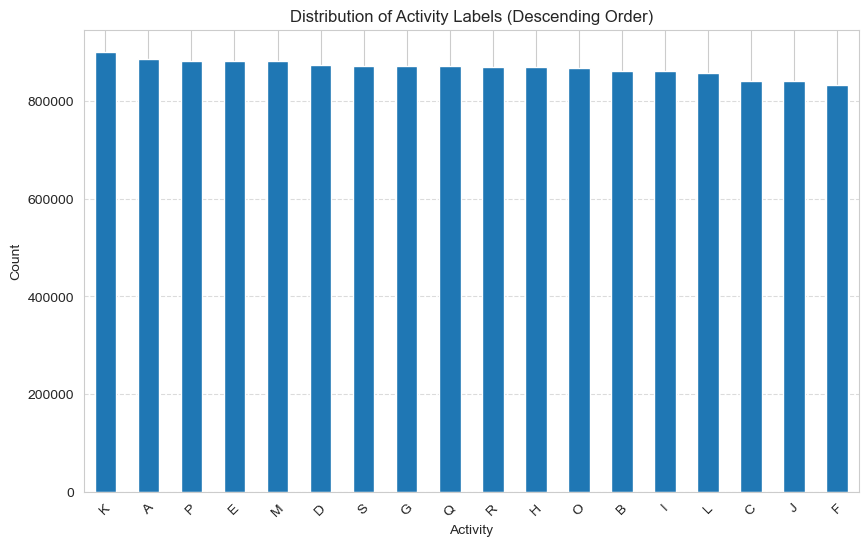

In [7]:
activity_counts = merged_data['Activity'].value_counts()

activity_counts_sorted = activity_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
activity_counts_sorted.plot(kind='bar')
plt.title('Distribution of Activity Labels (Descending Order)')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
print("Class Imbalance Statistics:")
print(activity_counts)

Class Imbalance Statistics:
Activity
K    901381
A    886762
P    882716
E    882587
M    882417
D    875030
S    872243
G    871710
Q    871159
R    869905
H    869704
O    868766
B    862281
I    861398
L    857571
C    841230
J    840358
F    833208
Name: count, dtype: int64


In [9]:
label_encoder = LabelEncoder()
merged_data['Activity'] = label_encoder.fit_transform(merged_data['Activity'])

scaler = StandardScaler()
merged_data[['x', 'y', 'z']] = scaler.fit_transform(merged_data[['x', 'y', 'z']])

In [10]:
merged_data.head()

,Subject-id,Activity,Timestamp,x,y,z
0,1600,0,252207666810782,-0.103053,2.069811,0.125421
1,1600,0,252207717164786,-0.210497,2.263886,0.115830
2,1600,0,252207767518790,0.390649,2.530596,0.519305
3,1600,0,252207817872794,0.067071,2.837559,-0.093806
4,1600,0,252207868226798,-0.478524,3.091634,-1.254006


In [11]:
merged_data.shape

(15630426, 6)

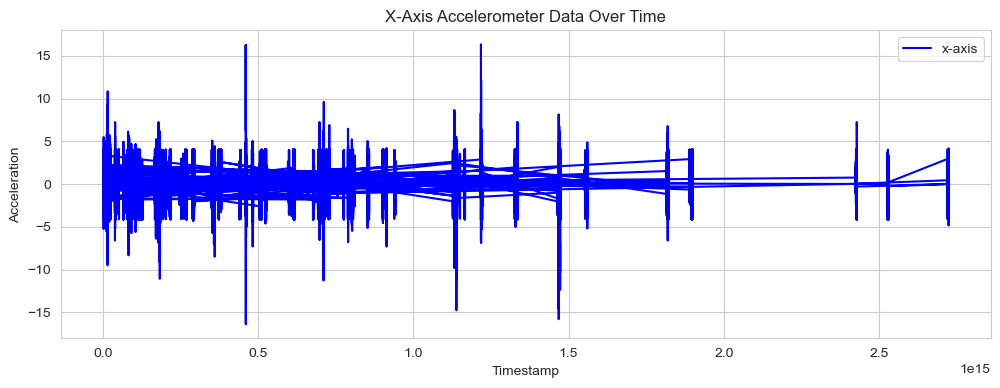

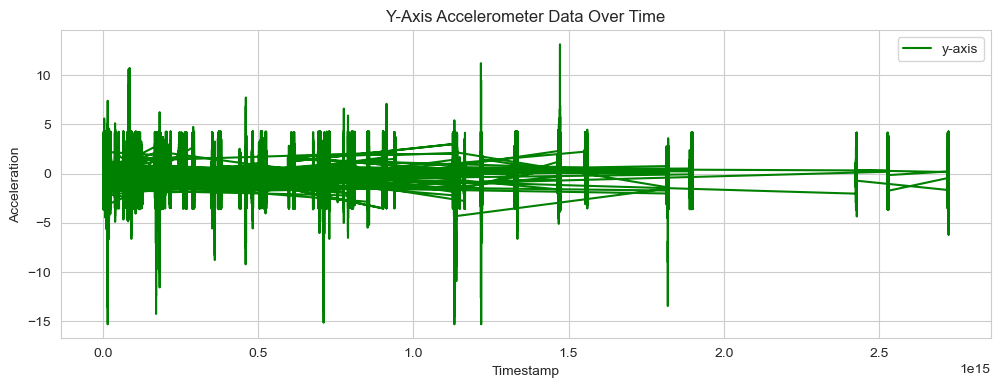

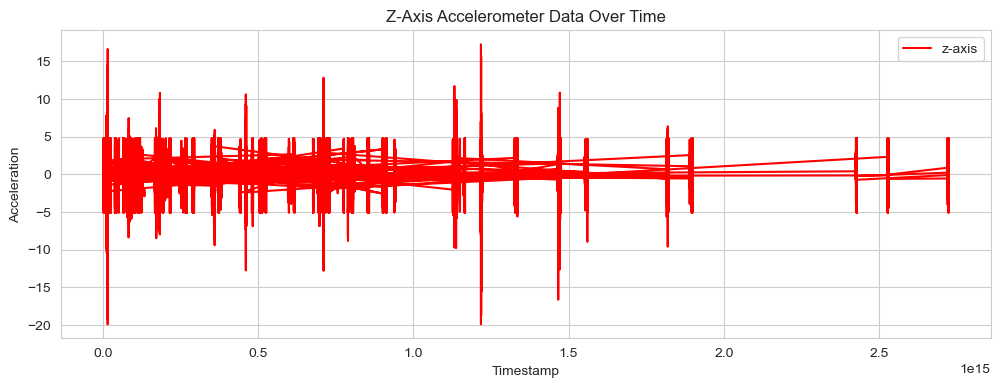

In [12]:
# Plot the time series for x-axis
plt.figure(figsize=(12, 4))
plt.plot(merged_data['Timestamp'], merged_data['x'], label='x-axis', color='blue')
plt.title('X-Axis Accelerometer Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

# Plot the time series for y-axis
plt.figure(figsize=(12, 4))
plt.plot(merged_data['Timestamp'], merged_data['y'], label='y-axis', color='green')
plt.title('Y-Axis Accelerometer Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

# Plot the time series for z-axis
plt.figure(figsize=(12, 4))
plt.plot(merged_data['Timestamp'], merged_data['z'], label='z-axis', color='red')
plt.title('Z-Axis Accelerometer Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

In [13]:
# Convert 'Timestamp' column to datetime
merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'])

In [14]:
merged_data.head()

,Subject-id,Activity,Timestamp,x,y,z
0,1600,0,1970-01-03 22:03:27.666810782,-0.103053,2.069811,0.125421
1,1600,0,1970-01-03 22:03:27.717164786,-0.210497,2.263886,0.115830
2,1600,0,1970-01-03 22:03:27.767518790,0.390649,2.530596,0.519305
3,1600,0,1970-01-03 22:03:27.817872794,0.067071,2.837559,-0.093806
4,1600,0,1970-01-03 22:03:27.868226798,-0.478524,3.091634,-1.254006


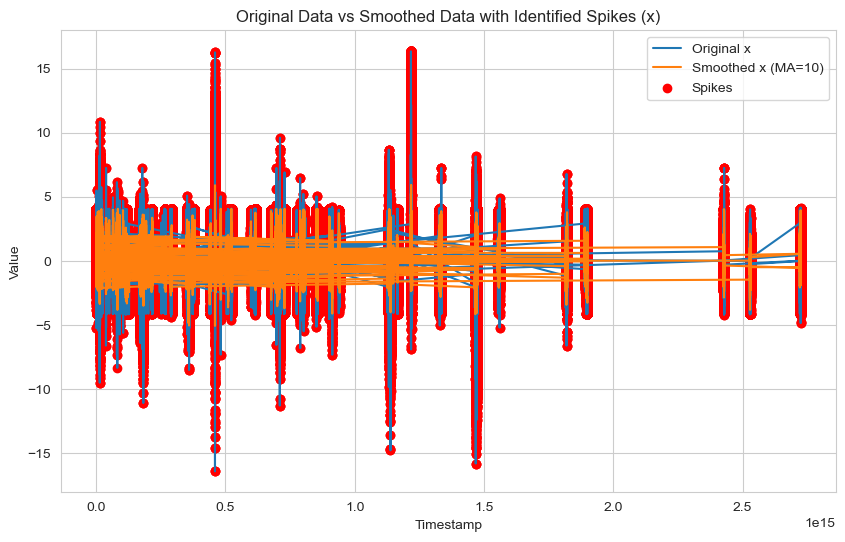

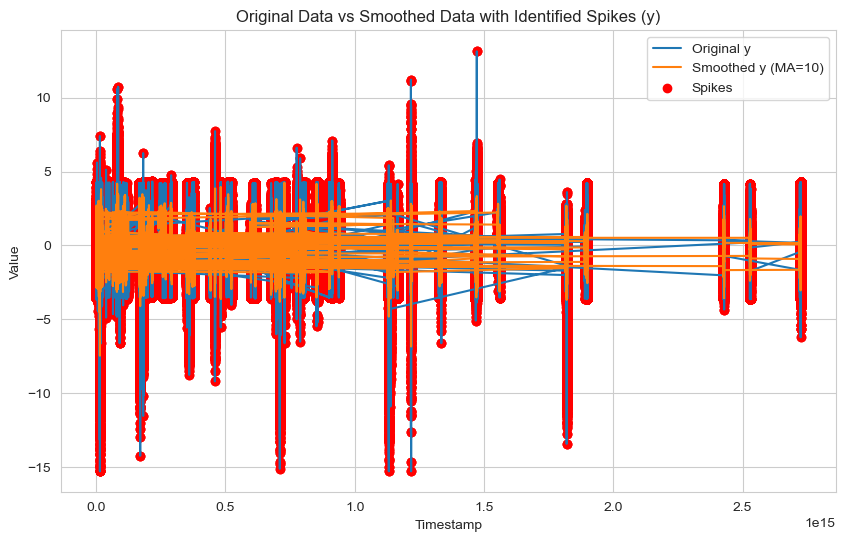

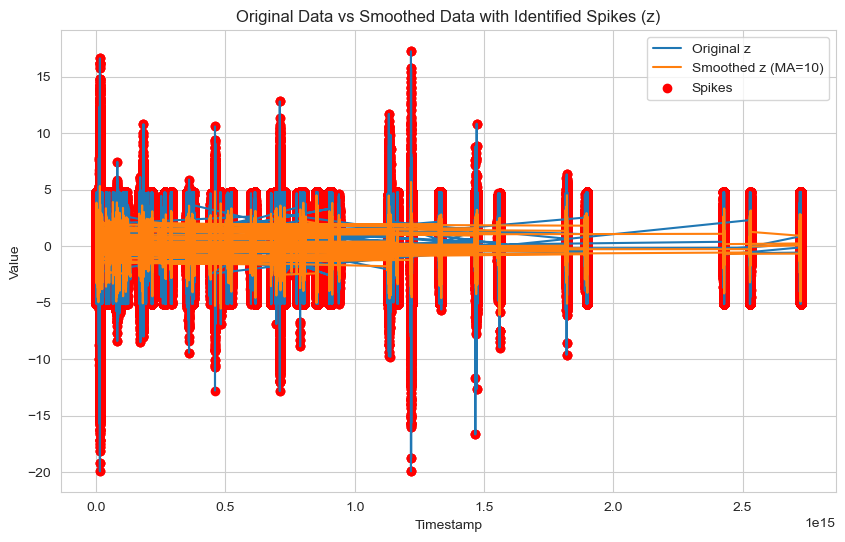

In [121]:
# Moving Average
window_size = 10
smoothed_data = merged_data[['x', 'y', 'z']].rolling(window=window_size).mean()

threshold = 0.5
spike_indices = np.where(np.abs(merged_data[['x', 'y', 'z']] - smoothed_data) > threshold)

plt.figure(figsize=(10, 6))
plt.plot(merged_data['Timestamp'], merged_data['x'], label='Original x')
plt.plot(merged_data['Timestamp'], smoothed_data['x'], label=f'Smoothed x (MA={window_size})')
plt.scatter(merged_data['Timestamp'].iloc[spike_indices[0]], merged_data['x'].iloc[spike_indices[0]], color='red', label='Spikes')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Data vs Smoothed Data with Identified Spikes (x)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(merged_data['Timestamp'], merged_data['y'], label='Original y')
plt.plot(merged_data['Timestamp'], smoothed_data['y'], label=f'Smoothed y (MA={window_size})')
plt.scatter(merged_data['Timestamp'].iloc[spike_indices[0]], merged_data['y'].iloc[spike_indices[0]], color='red', label='Spikes')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Data vs Smoothed Data with Identified Spikes (y)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(merged_data['Timestamp'], merged_data['z'], label='Original z')
plt.plot(merged_data['Timestamp'], smoothed_data['z'], label=f'Smoothed z (MA={window_size})')
plt.scatter(merged_data['Timestamp'].iloc[spike_indices[0]], merged_data['z'].iloc[spike_indices[0]], color='red', label='Spikes')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Data vs Smoothed Data with Identified Spikes (z)')
plt.legend()
plt.show()

In [123]:
# Retain only the spike data
spike_data = merged_data.iloc[spike_indices[0]]

# Optionally, you can reset the index if needed
spike_data.reset_index(drop=True, inplace=True)

In [129]:
spike_data.head()

,Subject-id,Activity,Timestamp,x,y,z
0,1600,0,252208119996817,-0.404941,1.058324,0.205717
1,1600,0,252208170350821,-0.263559,1.223043,0.438313
2,1600,0,252208170350821,-0.263559,1.223043,0.438313
3,1600,0,252208220704825,-0.007563,1.654430,0.338105
4,1600,0,252208271058829,-0.243168,3.426651,0.524938


In [130]:
spike_data.shape

(5176942, 6)

In [131]:
window_size = 100
step_size = 50

def create_windows(data, window_size, step_size):
    windows = []
    labels = []
    for i in range(0, len(data) - window_size + 1, step_size):
        window = data.iloc[i:i+window_size]
        if len(window) == window_size:
            windows.append(window[['x', 'y', 'z']].values)
            labels.append(data['Activity'].iloc[i])
    return np.array(windows), np.array(labels)

X, y = create_windows(spike_data, window_size, step_size)

X = X.reshape(-1, window_size, 3)

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (103537, 100, 3)
Shape of y: (103537,)


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (82829, 100, 3)
Shape of y_train: (82829,)
Shape of X_test: (20708, 100, 3)
Shape of y_test: (20708,)


In [133]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\carlm\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [134]:
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 84s 63ms/step - accuracy: 0.3710 - loss: 1.8945 - val_accuracy: 0.5893 - val_loss: 1.2605
Epoch 2/10
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.5895 - loss: 1.2477 - val_accuracy: 0.6419 - val_loss: 1.0868
Epoch 3/10
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.6349 - loss: 1.0973 - val_accuracy: 0.6562 - val_loss: 1.0108
Epoch 4/10
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.6612 - loss: 1.0109 - val_accuracy: 0.6879 - val_loss: 0.9405
Epoch 5/10
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.6893 - loss: 0.9361 - val_accuracy: 0.7157 - val_loss: 0.8720
Epoch 6/10
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.7127 - loss: 0.8778 - val_accuracy: 0.7329 - val_loss: 0.8214
Epoch 7/10
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 86s 67ms/step - accuracy: 0.7272 - loss: 0.8356 - val_accuracy: 0.7463 - val_loss: 0.7758
Epoch 8/10
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.7483 -

In [135]:
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

648/648 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7808 - loss: 0.6877
Test Loss: 0.6816300749778748, Test Accuracy: 0.7810990810394287


In [149]:
cnn_lstm_model = Sequential()

# Convolutional layers
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(Dropout(0.2))

# First LSTM layer
cnn_lstm_model.add(LSTM(units=64, activation='tanh', return_sequences=True))  # Added return_sequences=True

# Second LSTM layer
cnn_lstm_model.add(LSTM(units=64, activation='tanh'))

# Dense layers
cnn_lstm_model.add(Dense(units=64, activation='relu'))
cnn_lstm_model.add(Dropout(0.2))
cnn_lstm_model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

# Define the learning rate
learning_rate = 0.001  # Adjust as needed

# Compile model with custom learning rate
cnn_lstm_model.compile(optimizer=Adam(learning_rate=learning_rate), 
                        loss='sparse_categorical_crossentropy', 
                        metrics=['accuracy'])
# Print model summary
cnn_lstm_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 98, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 49, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,018 (281.32 KB)

 Trainable params: 72,018 (281.32 KB)

 Non-trainable params: 0 (0.00 B)

In [150]:
history = cnn_lstm_model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = cnn_lstm_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/15
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 104s 77ms/step - accuracy: 0.4489 - loss: 1.6653 - val_accuracy: 0.6686 - val_loss: 0.9775
Epoch 2/15
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 97s 75ms/step - accuracy: 0.6705 - loss: 0.9871 - val_accuracy: 0.7291 - val_loss: 0.8198
Epoch 3/15
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 97s 75ms/step - accuracy: 0.7306 - loss: 0.8212 - val_accuracy: 0.7659 - val_loss: 0.7246
Epoch 4/15
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 97s 75ms/step - accuracy: 0.7693 - loss: 0.7183 - val_accuracy: 0.7992 - val_loss: 0.6263
Epoch 5/15
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 98s 76ms/step - accuracy: 0.7905 - loss: 0.6581 - val_accuracy: 0.8135 - val_loss: 0.5840
Epoch 6/15
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 97s 75ms/step - accuracy: 0.8132 - loss: 0.5953 - val_accuracy: 0.8300 - val_loss: 0.5390
Epoch 7/15
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 98s 75ms/step - accuracy: 0.8273 - loss: 0.5564 - val_accuracy: 0.8314 - val_loss: 0.5355
Epoch 8/15
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 99s 76ms/step - accuracy: 0.8380 

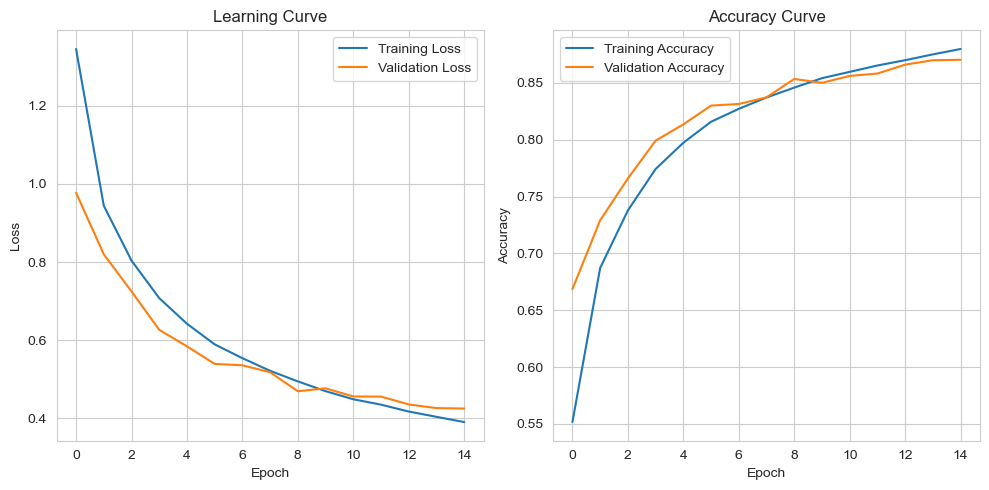

In [151]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [152]:
cnn_lstm_predictions = cnn_lstm_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)

combined_predictions = np.argmax((cnn_lstm_predictions + lstm_predictions) / 2, axis=1)

ensemble_accuracy = np.mean(combined_predictions == y_test)
print("Ensemble Accuracy:", ensemble_accuracy)

648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step
Ensemble Accuracy: 0.866814757581611


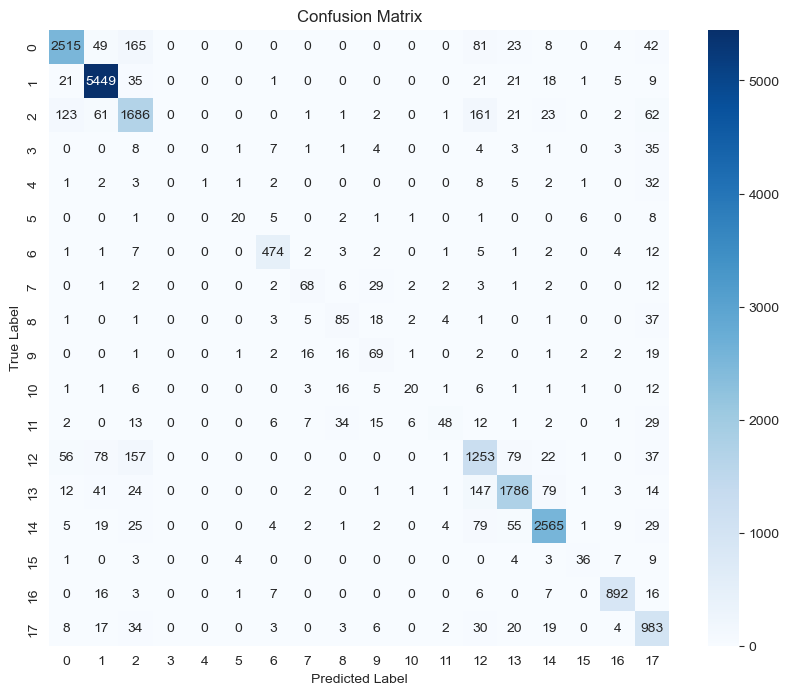

In [153]:
conf_matrix = confusion_matrix(y_test, combined_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [154]:
f1 = f1_score(y_test, combined_predictions, average='weighted')

mae = mean_absolute_error(y_test, combined_predictions)

mse = mean_squared_error(y_test, combined_predictions)

print("F1 Score:", f1)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

F1 Score: 0.8633315433623814
Mean Absolute Error (MAE): 0.862999806837937
Mean Squared Error (MSE): 9.090448135986092


[ref]: #top
[Back to Table of Contents][ref]

<a name="res_dis"></a>
## Results and Discussions

In this section, results of all the graphs will be provided, along with a brief discussion.
***

**Distribution of Activity Labels (Descending Order)** 
The bar graph titled "Distribution of Activity Labels (Descending Order)" illustrates the frequency of each activity label in the dataset. Each activity is represented by a letter on the x-axis, while the corresponding count of occurrences is depicted on the y-axis, ranging from 0 to approximately 900,000. The bars are sorted in descending order based on the frequency of each activity label. From the data provided, it's evident that activity "K" has the highest count of 901,381 occurrences, followed by "A" with 886,762 occurrences, and so on. This visualization provides a clear overview of the distribution of activity labels within the dataset, highlighting the relative prevalence of each activity.

**Learning Curve**
The Learning Curve graph illustrates the change in loss over epochs during the training process. On the x-axis, representing the number of epochs ranging from 0 to 15, and the y-axis, depicting the loss values from 1.2 to 0.4. The curve shows a downward trend, indicating that both the training loss and validation loss decrease as the number of epochs increases. This suggests that the model's performance improves over time as it undergoes training.

**Accuracy Curve**
Similarly, the Accuracy Curve graph displays the evolution of accuracy over epochs. The x-axis denotes the epochs, ranging from 0 to 35, while the y-axis represents the accuracy values from 0.55 to 0.85. In contrast to the loss curve, the accuracy curve shows an upward trend, indicating an increase in both training and validation accuracy as the number of epochs progresses. This signifies that the model's ability to correctly classify instances improves with training, demonstrating its learning capabilitie

**Confusion Matrix**
The confusion matrix provides a comprehensive overview of the model's classification performance for the analyzed dataset. It reveals the number of correct predictions (true positives) along the diagonal, indicating the model's accuracy for each activity. Off-diagonal elements highlight misclassifications, showing where the model struggles to distinguish between certain activities. The heatmap visualization allows for quick identification of areas with higher or lower classification accuracy, with darker shades representing higher concentrations of correct predictions along the diagonal. Overall, the confusion matrix serves as a valuable tool for evaluating the effectiveness of the classification model and pinpointing specific areas for improvement.s.

[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
The analysis of the developed CNN-LSTM and LSTM models reveals promising performance with somewhat high accuracy and F1 score on the test set. Additionally, the ensemble approach, combining predictions from both models through majority voting, demonstrates potential in enhancing overall accuracy. It is recommended to further fine-tune hyperparameters, utilize cross-validation techniques, and explore additional feature engineering methods to optimize model performance and ensure robustness in real-world applications.
***

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
SPRH LABS. (2021, December 8). Understanding deep learning: DNN, RNN, LSTM, CNN and R-CNN. Medium. https://medium.com/@sprhlabs/understanding-deep-learning-dnn-rnn-lstm-cnn-and-r-cnn-6602ed94dbff

OpenAI. (2024, April 20). ChatGPT (3.5) [Software]. https://openai.com/chatgpt


***

[ref]: #top
[Back to Table of Contents][ref]